# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities:

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#Import the OpenWeatherMap API key
from api_keys import weather_api_key

#Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library:

In [2]:
#Empty list for holding the latitude and longitude combinations
lat_lngs = []

#Empty list for holding the cities names
cities = []

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude:

### ~ Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code ~

In [3]:
#Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

#Define an empty list to fetch the weather data for each city
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1
        
#Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    #Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units="
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #Add 1 to the record count
    record_count += 1

    #Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        #Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | khovd
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | saipan
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | broome
Processing Record 12 of Set 1 | verkhnevilyuysk
Processing Record 13 of Set 1 | nantucket
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | nagqu
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | sao gabriel da cachoeira
Processing Record 20 of Set 1 | choibalsan
Processing Record 21 of Set 1 | bikenibeu village
Proc

Processing Record 41 of Set 4 | katsuren-haebaru
Processing Record 42 of Set 4 | ostersund
Processing Record 43 of Set 4 | izhmorskiy
Processing Record 44 of Set 4 | aracuai
Processing Record 45 of Set 4 | kargat
Processing Record 46 of Set 4 | okhotsk
Processing Record 47 of Set 4 | smithers
Processing Record 48 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 49 of Set 4 | port elizabeth
Processing Record 0 of Set 5 | olyokminsk
Processing Record 1 of Set 5 | hualien city
Processing Record 2 of Set 5 | bermejo
Processing Record 3 of Set 5 | pisco
Processing Record 4 of Set 5 | khandyga
Processing Record 5 of Set 5 | pionerskiy
Processing Record 6 of Set 5 | san antonio del estrecho
City not found. Skipping...
Processing Record 7 of Set 5 | hamilton
Processing Record 8 of Set 5 | flying fish cove
Processing Record 9 of Set 5 | afaahiti
Processing Record 10 of Set 5 | dryden
Processing Record 11 of Set 5 | kegen
Processing Record 12 of Set 5 | port mathurin
Processin

Processing Record 31 of Set 8 | port augusta
Processing Record 32 of Set 8 | mizdah
Processing Record 33 of Set 8 | bratislava
Processing Record 34 of Set 8 | nova xavantina
Processing Record 35 of Set 8 | meadow lake
Processing Record 36 of Set 8 | dawei
Processing Record 37 of Set 8 | lesnikovo
Processing Record 38 of Set 8 | sechura
Processing Record 39 of Set 8 | shakawe
Processing Record 40 of Set 8 | sisimiut
Processing Record 41 of Set 8 | grandview
Processing Record 42 of Set 8 | ribeira brava
Processing Record 43 of Set 8 | pacific grove
Processing Record 44 of Set 8 | molchanovo
Processing Record 45 of Set 8 | kuraymah
Processing Record 46 of Set 8 | lubang
Processing Record 47 of Set 8 | nay pyi taw
Processing Record 48 of Set 8 | isle of lewis
City not found. Skipping...
Processing Record 49 of Set 8 | comodoro rivadavia
Processing Record 0 of Set 9 | itoman
Processing Record 1 of Set 9 | coronel dorrego
Processing Record 2 of Set 9 | uturoa
Processing Record 3 of Set 9 | t

Processing Record 20 of Set 12 | kaa-khem
Processing Record 21 of Set 12 | tranovaho
City not found. Skipping...
Processing Record 22 of Set 12 | kihurio
Processing Record 23 of Set 12 | taltal
Processing Record 24 of Set 12 | mutoko
Processing Record 25 of Set 12 | vetluzhskiy
Processing Record 26 of Set 12 | tofol
Processing Record 27 of Set 12 | kikvidze
Processing Record 28 of Set 12 | sidney
Processing Record 29 of Set 12 | port blair
Processing Record 30 of Set 12 | berdyaush
Processing Record 31 of Set 12 | kulhudhuffushi
Processing Record 32 of Set 12 | puerto aysen
Processing Record 33 of Set 12 | aberdeen
Processing Record 34 of Set 12 | labrador city
Processing Record 35 of Set 12 | palmer
Processing Record 36 of Set 12 | angren
Processing Record 37 of Set 12 | toga village
City not found. Skipping...
Processing Record 38 of Set 12 | sihanoukville
Processing Record 39 of Set 12 | suai
City not found. Skipping...
Processing Record 40 of Set 12 | turochak
Processing Record 41 

In [4]:
#Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
#Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,302.13,77,45,5.42,EC,1690150131
1,khovd,48.0056,91.6419,290.67,35,88,2.13,MN,1690150132
2,bilibino,68.0546,166.4372,290.59,62,82,0.69,RU,1690150130
3,blackmans bay,-43.0167,147.3167,284.00,86,81,2.03,AU,1690150124
4,port-aux-francais,-49.3500,70.2167,279.06,86,80,15.58,TF,1690150133


In [6]:
#Export the City_Data into a csv
city_data_df.to_csv("Output_Data/cities.csv", index_label="City_ID")

In [7]:
#Read saved data
city_data_df = pd.read_csv("Output_Data/cities.csv", index_col="City_ID")

#Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,302.13,77,45,5.42,EC,1690150131
1,khovd,48.0056,91.6419,290.67,35,88,2.13,MN,1690150132
2,bilibino,68.0546,166.4372,290.59,62,82,0.69,RU,1690150130
3,blackmans bay,-43.0167,147.3167,284.00,86,81,2.03,AU,1690150124
4,port-aux-francais,-49.3500,70.2167,279.06,86,80,15.58,TF,1690150133


### Create the Scatter Plots Requested:

#### Latitude vs. Temperature

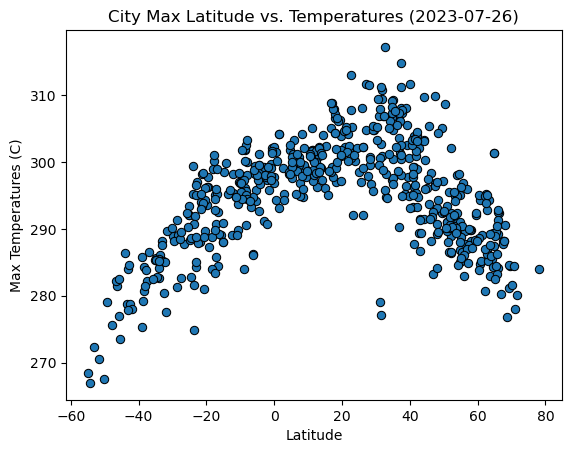

In [8]:
#Build scatter plot for latitude vs. Temperature
plt.plot(city_data_df["Lat"],
         city_data_df["Max Temp"],
         linestyle = "none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth=0.75)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures (C)")
plt.title("City Max Latitude vs. Temperatures (2023-07-26)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity

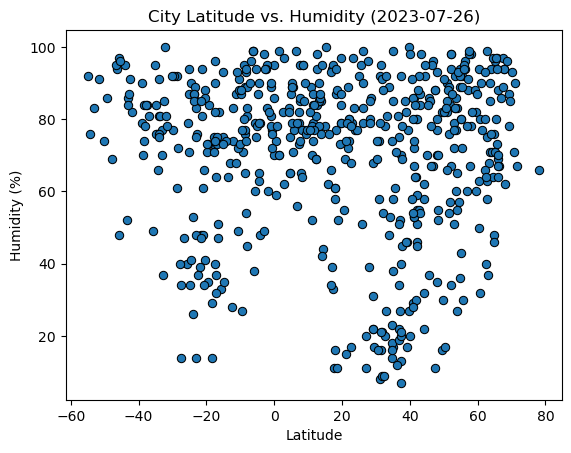

In [9]:
#Build the scatter plots for latitude vs. Humidity
plt.plot(city_data_df["Lat"],
         city_data_df["Humidity"],
         linestyle = "none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth=0.75)

#Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-07-26)")

#Save the figure
plt.savefig("output_data/Fig2.png")

#Show plot
plt.show()

#### Latitude vs. Cloudiness

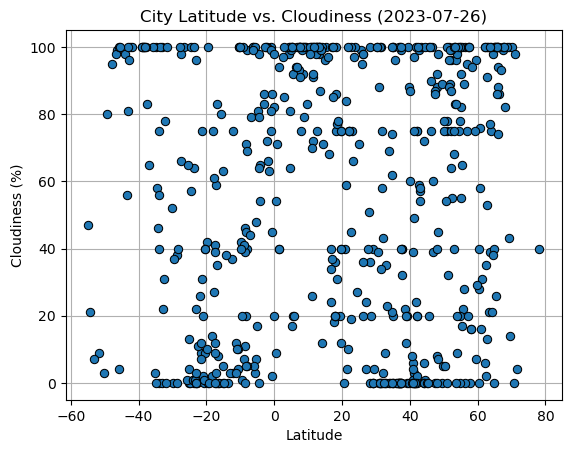

In [10]:
#Build the scatter plots for latitude vs. Cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)
        
#Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-07-26)")
plt.grid()

#Save the figure
plt.savefig("output_data/Fig3.png")

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

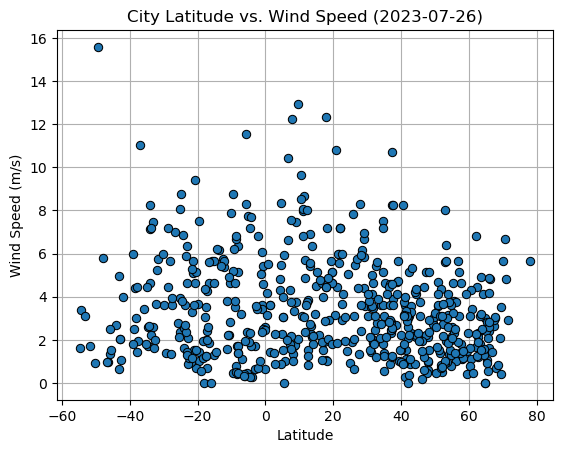

In [11]:
#Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)
        
#Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-07-26)")
plt.grid()

#Save the figure
plt.savefig("output_data/Fig4.png")

#Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship:


In [37]:
#Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [38]:
#Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemis_df = city_data_df[city_data_df["Lat"] >= 0]

#Display sample data
northern_hemis_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,khovd,48.0056,91.6419,290.67,35,88,2.13,MN,1690150132
2,bilibino,68.0546,166.4372,290.59,62,82,0.69,RU,1690150130
7,isafjordur,66.0755,-23.1240,284.19,88,100,1.60,IS,1690150133
8,saipan,15.1355,145.7010,302.40,100,100,5.14,MP,1690150134
10,broome,42.2506,-75.8330,302.43,51,75,3.09,US,1690150135


In [39]:
#Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemis_df = city_data_df[city_data_df["Lat"] < 0]

#Display sample data
southern_hemis_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,302.13,77,45,5.42,EC,1690150131
3,blackmans bay,-43.0167,147.3167,284.00,86,81,2.03,AU,1690150124
4,port-aux-francais,-49.3500,70.2167,279.06,86,80,15.58,TF,1690150133
5,grytviken,-54.2811,-36.5092,266.98,76,21,3.39,GS,1690150121
6,adamstown,-25.0660,-130.1015,293.38,71,4,8.08,PN,1690150133


###  Temperature vs. Latitude Linear Regression Plot:

The r-value is: 0.3618853686647042


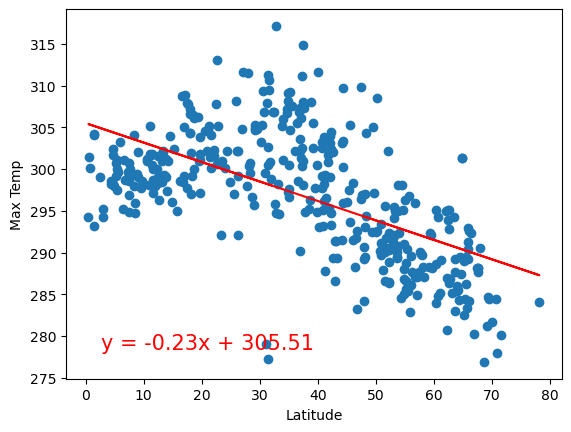

In [69]:
#Linear regression on Northern Hemisphere
x_values = northern_hemis_df["Lat"]
y_values = northern_hemis_df["Max Temp"]

#Print linear regression formula
linear_regression(x_values, y_values, 0.07, 0.08)

The r-value is: 0.672847219006374


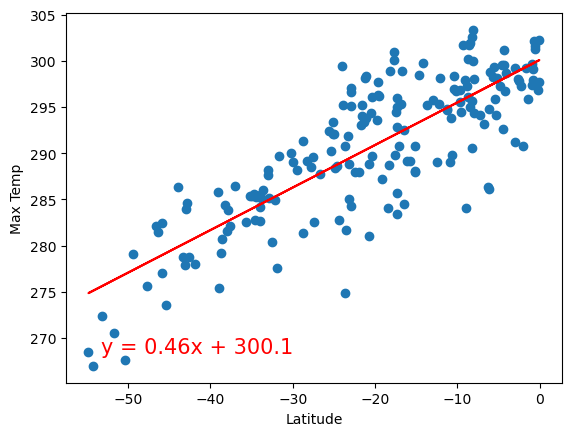

In [68]:
#Linear regression on Southern Hemisphere
x_values = southern_hemis_df["Lat"]
y_values = southern_hemis_df["Max Temp"]

#Print linear regression formula
linear_regression(x_values, y_values, 0.07, 0.08)

**Discussion about the linear relationship**: Temperature

~ Northern Hemisphere Observations:

~ Southern Hemisphere Observations:

### Humidity vs. Latitude Linear Regression Plot:

The r-value is: 0.0003726891224325544


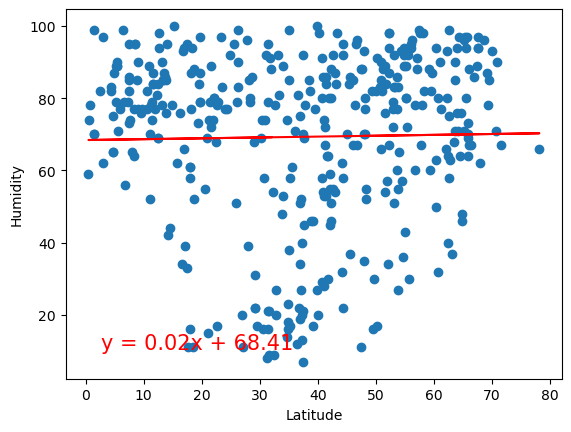

In [66]:
#Northern Hemisphere
x_values = northern_hemis_df["Lat"]
y_values = northern_hemis_df["Humidity"]

#Print linear regression formula
linear_regression(x_values, y_values, 0.07, 0.08)

The r-value is: 0.000969238130280955


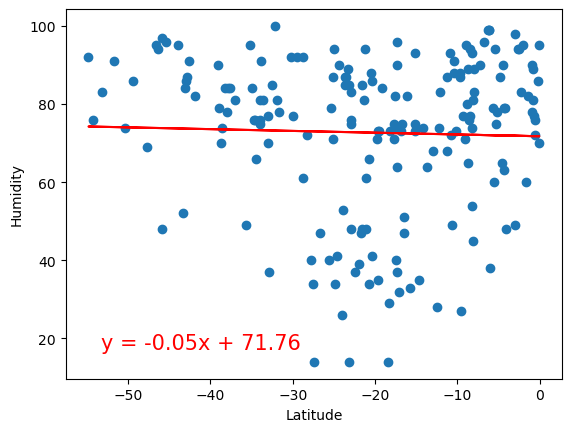

In [65]:
# Southern Hemisphere
x_values = southern_hemis_df["Lat"]
y_values = southern_hemis_df["Humidity"]

#Print linear regression formula
linear_regression(x_values, y_values, 0.07, 0.08)

**Discussion about the linear relationship**: Humidity

~ Northern Hemisphere Observations:

~ Southern Hemisphere Observations:

### Cloudiness vs. Latitude Linear Regression Plot:

The r-value is: 0.011772196779077348


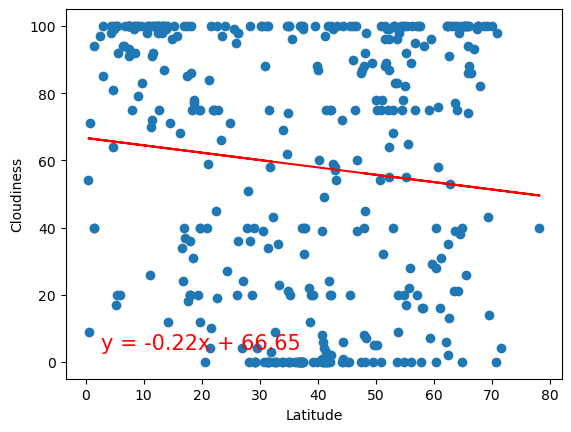

In [64]:
#Northern Hemisphere
x_values = northern_hemis_df["Lat"]
y_values = northern_hemis_df["Cloudiness"]

#Print linear regression formula
linear_regression(x_values, y_values, 0.07, 0.08)

The r-value is: 0.006550333849911314


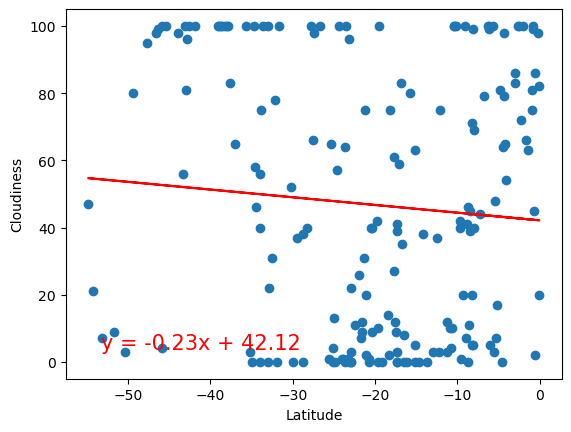

In [63]:
#Southern Hemisphere
x_values = southern_hemis_df["Lat"]
y_values = southern_hemis_df["Cloudiness"]

#Print linear regression formula
linear_regression(x_values, y_values, 0.07, 0.08)

**Discussion about the linear relationship**: Cloudiness

~ Northern Hemisphere Observations:

~ Southern Hemisphere Observations:

### Wind Speed vs. Latitude Linear Regression Plot:

The r-value is: 0.08237213285746299


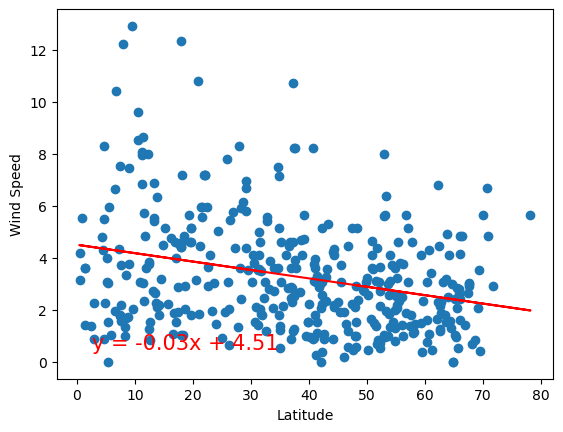

In [62]:
#Northern Hemisphere
x_values = northern_hemis_df["Lat"]
y_values = northern_hemis_df["Wind Speed"]

#Print linear regression formula
linear_regression(x_values, y_values, 0.07, 0.08)

The r-value is: 0.0011484443041778032


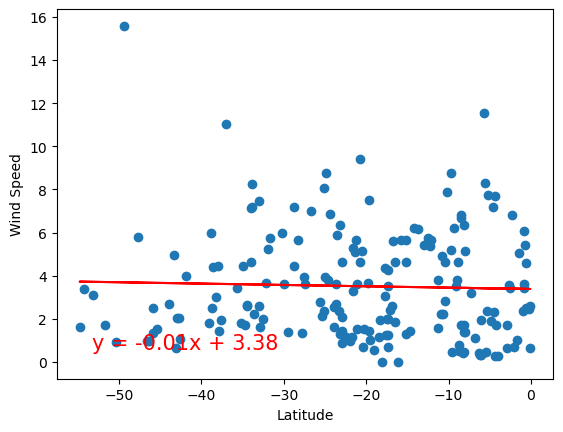

In [61]:
#Southern Hemisphere
x_values = southern_hemis_df["Lat"]
y_values = southern_hemis_df["Wind Speed"]

#Print linear regression formula
linear_regression(x_values, y_values, 0.07, 0.08)

**Discussion about the linear relationship**: Wind Speed

~ Northern Hemisphere Observations:

~ Southern Hemisphere Observations: